># ROCK PAPER SCISSORS
![](https://pxt.azureedge.net/blob/68f66c3ddc3acfc4c53157abf92eace202d46db2/static/courses/csintro/conditionals/rock-paper-scissors-items.png)

In [21]:
import os
import PIL
from PIL import Image

In [22]:
train_rock_dir = os.path.join('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps/rock')
train_paper_dir = os.path.join('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps/paper')
train_scissors_dir = os.path.join('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps/scissors')

In [23]:
print('Total training rock images: ', len(os.listdir(train_rock_dir)))
print('Total training paper images: ', len(os.listdir(train_paper_dir)))
print('Total training scissor images: ', len(os.listdir(train_scissors_dir)))


Total training rock images:  840
Total training paper images:  840
Total training scissor images:  840


In [24]:
test_rock_dir = os.path.join('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps-test-set/rock')
test_paper_dir = os.path.join('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps-test-set/paper')
test_scissors_dir = os.path.join('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps-test-set/scissors')

In [25]:
print('Total validation rock images: ', len(os.listdir(test_rock_dir)))
print('Total validation paper images: ', len(os.listdir(test_paper_dir)))
print('Total validation scissor images: ', len(os.listdir(test_scissors_dir)))


Total validation rock images:  124
Total validation paper images:  124
Total validation scissor images:  124


In [26]:
train_rock_name=os.listdir(train_rock_dir)
train_paper_name=os.listdir(train_paper_dir)
train_scissors_name=os.listdir(train_scissors_dir)

In [27]:
test_rock_name=os.listdir(test_rock_dir)
test_paper_name=os.listdir(test_paper_dir)
test_scissors_name=os.listdir(test_scissors_dir)

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import random

#Declearing parameters for rows and columns
n_rows=3
n_columns=4

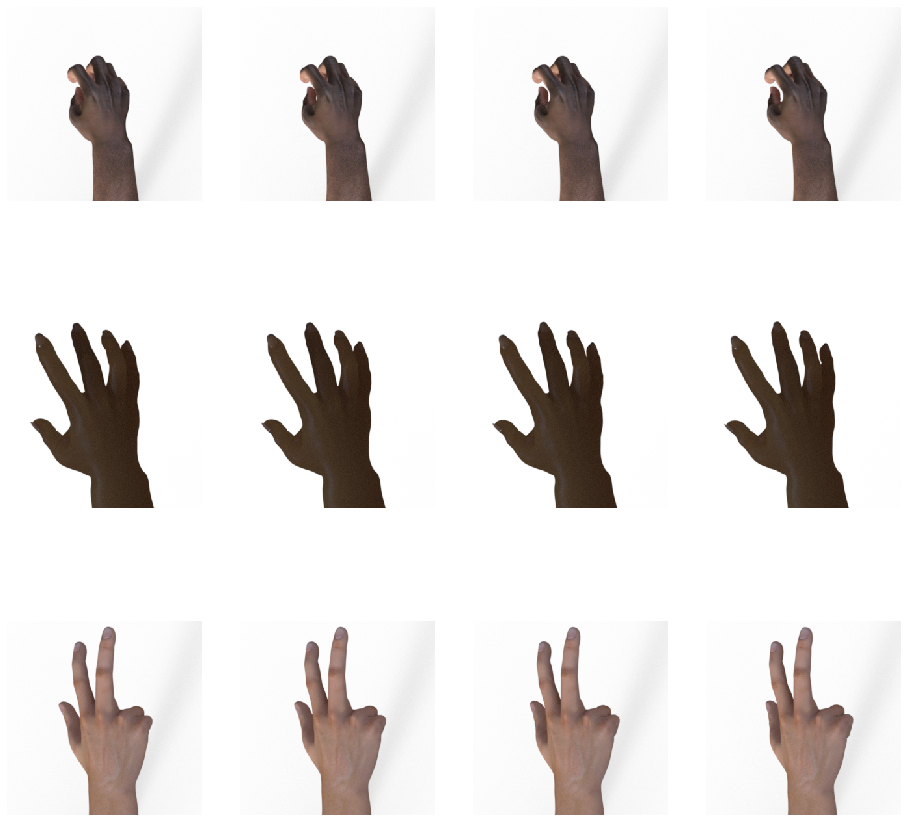

In [29]:

#Picking random no. of images for total 
rock_pic_index =  random.randrange(1,836)
paper_pic_index = random.randrange(1,836)
scissors_pic_index = random.randrange(1,836)

# Set up a matploit fig and size it to fit 4*3
fig = plt.gcf()
fig.set_size_inches(16,16)

next_rock = [os.path.join(train_rock_dir, fname)
             for fname in train_rock_name[rock_pic_index:rock_pic_index+4]]

next_paper = [os.path.join(train_paper_dir, fname)
             for fname in train_paper_name[paper_pic_index:paper_pic_index+4]]

next_scissors = [os.path.join(train_scissors_dir, fname)
             for fname in train_scissors_name[scissors_pic_index:scissors_pic_index+4]]


for i, img_path in enumerate(next_rock+ next_paper+ next_scissors):
    sp=plt.subplot(n_rows,n_columns,i+1)
    sp.axis('off')# Grid type not shown
    img = npimg.imread(img_path)
    plt.imshow(img)
    
plt.show()    



In [30]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),                       
                                   tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dropout(0.5),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(3, activation='softmax')])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [32]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer= 'rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
# using Image Data Generator for rescaling and making train set and validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./225,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./225)

In [34]:
training_set = train_datagen.flow_from_directory('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps',target_size=(150,150),class_mode='categorical')

Found 2520 images belonging to 3 classes.


In [35]:
validation_set = train_datagen.flow_from_directory('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rps-test-set',target_size=(150,150),class_mode='categorical')

Found 372 images belonging to 3 classes.


In [36]:
history=model.fit_generator(training_set,epochs=20,
                                 validation_data = validation_set,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
79/79 [==============================] - 96s 1s/step - loss: 1.0892 - acc: 0.4071 - val_loss: 0.8727 - val_acc: 0.5860
Epoch 2/20
79/79 [==============================] - 90s 1s/step - loss: 0.7813 - acc: 0.6460 - val_loss: 0.8126 - val_acc: 0.5672
Epoch 3/20
79/79 [==============================] - 95s 1s/step - loss: 0.5098 - acc: 0.7873 - val_loss: 0.3203 - val_acc: 0.8871
Epoch 4/20
79/79 [==============================] - 92s 1s/step - loss: 0.3858 - acc: 0.8500 - val_loss: 0.3885 - val_acc: 0.8790
Epoch 5/20
79/79 [==============================] - 99s 1s/step - loss: 0.2537 - acc: 0.9123 - val_loss: 0.2949 - val_acc: 0.8978
Epoch 6/20
79/79 [==============================] - 96s 1s/step - loss: 0.2323 - acc: 0.9087 - val_loss: 0.2030 - val_acc: 0.9274
Epoch 7/20
79/79 [==============================] - 97s 1s/step - loss: 0.1841 - acc: 0.9385 - val_loss: 0.2612 - val_acc: 0.9355
Epoch 8/20
79/79 [========================

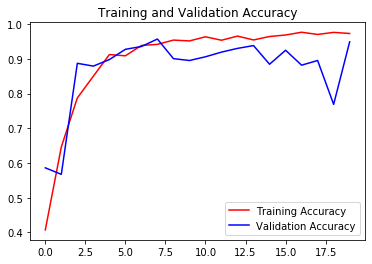

<Figure size 432x288 with 0 Axes>

In [37]:
#Varation in this graph is due to overfitting to reduce overfitting use droupout
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r',label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

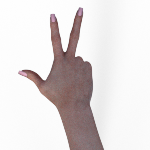

In [69]:
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
test_image = image.load_img('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/scissors5.png', target_size=(150,150))
test_image

In [70]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0)



#x=preprocess_input(x)   # preprocessing with vgg16
images = np.vstack([x])
classes = model.predict(images,batch_size=10)

In [71]:
print(classes)

[[0. 0. 1.]]


In [72]:
def tell(classes):
    if classes[0][2] == 1:
        print('Its a Scissors')
    if classes[0][1] == 1:
        print('Its a Rock')
    if classes[0][0] == 1:
        print('Its a Paper')

In [73]:
#print(classes[0][2])

In [74]:
tell(classes)

Its a Scissors


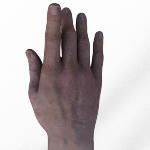

In [75]:
test_image = image.load_img('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/paper1.png', target_size=(150,150))
test_image

In [76]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0)



#x=preprocess_input(x)   # preprocessing with vgg16
images = np.vstack([x])
classes = model.predict(images,batch_size=10)

In [77]:
print(classes)

[[1. 0. 0.]]


In [78]:
tell(classes)

Its a Paper


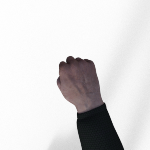

In [80]:
test_image = image.load_img('C:/Users/Pankaj Mahtolia/Desktop/ML/SPS/rock1.png', target_size=(150,150))
test_image

In [81]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0)



#x=preprocess_input(x)   # preprocessing with vgg16
images = np.vstack([x])
classes = model.predict(images,batch_size=10)

In [82]:
print(classes)

[[0. 1. 0.]]


In [83]:
tell(classes)

Its a Rock


># --------------  THANKS --------------------